<a href="https://colab.research.google.com/github/thekoushikdurgas/collega/blob/master/Lab_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1j7T60eefZWkgc6gnlfUpL_QR9a7311zG" -O "eeg_data.csv"

--2020-08-28 06:31:32--  https://drive.google.com/uc?export=download&id=1j7T60eefZWkgc6gnlfUpL_QR9a7311zG
Resolving drive.google.com (drive.google.com)... 64.233.188.100, 64.233.188.102, 64.233.188.101, ...
Connecting to drive.google.com (drive.google.com)|64.233.188.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8hhf55tos0eptv17o2uukqt53acg6ne0/1598596275000/17459017954710433412/*/1j7T60eefZWkgc6gnlfUpL_QR9a7311zG?e=download [following]
--2020-08-28 06:31:35--  https://doc-0k-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8hhf55tos0eptv17o2uukqt53acg6ne0/1598596275000/17459017954710433412/*/1j7T60eefZWkgc6gnlfUpL_QR9a7311zG?e=download
Resolving doc-0k-50-docs.googleusercontent.com (doc-0k-50-docs.googleusercontent.com)... 64.233.187.132, 2404:6800:4008:c05::84
Connecting to doc-0k-50-docs.googleusercontent.com (doc-0k

# <a id='intro'> Data Description</a>

The [EEG-Alcohol](https://www.kaggle.com/nnair25/Alcoholics) dataset, contains [EEG (Electroencephalography)](https://en.wikipedia.org/wiki/Electroencephalography) data for two groups - Alcoholic and Control Group. 
![](https://i.imgur.com/ZrmxJRu.jpg)

There are two groups of subjects: alcoholic and control. In both groups,
there are 10 subjects and each subject completed 10 trials. The 64 electrodes were placed on subject's scalps to measure the electrical activity of the brain. The response values were sampled at 256 Hz (3.9-msec epoch) for 1 second. Each subject was exposed to either a single stimulus (S1) or to two stimuli (S1 and S2) which were pictures of objects chosen from the [1980 Snodgrass and Vanderwart picture set](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.294.1979&rep=rep1&type=pdf). When two stimuli were shown, they were presented in either a matched condition where S1 was identical to S2 or in a non-matched condition where S1 differed from S2.

The purpose of the analysis is to find out if there is a difference in response values for different stimuli between control and alcoholic group. 

In [ ]:
import numpy as np
import pandas as pd 
import os
import random
from tqdm import tqdm
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from scipy.stats import mannwhitneyu
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
%matplotlib inline
init_notebook_mode(connected=True) ## plotly init
seed = 123
random.seed = seed
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
EEG_data = pd.read_csv("eeg_data.csv")

In [ ]:
EEG_data.head()

,subject identifier,time,AF1,AF2,AF7,AF8,AFZ,C1,C2,C3,C4,C5,C6,CP1,CP2,CP3,CP4,CP5,CP6,CPZ,CZ,F1,F2,F3,F4,F5,F6,F7,F8,FC1,FC2,FC3,FC4,FC5,FC6,FCZ,FP1,FP2,FPZ,FT7,FT8,FZ,O1,O2,OZ,P1,P2,P3,P4,P5,P6,P7,P8,PO1,PO2,PO7,PO8,POZ,PZ,T7,T8,TP7,TP8,X,Y,nd,matching condition_S1 obj,matching condition_S2 match,matching condition_S2 nomatch
0,a,0.582031,-0.193,-0.865,-1.872,-4.211,-0.417,-0.590,-0.092,-2.706,-1.231,-2.340,-4.201,-2.126,2.014,0.651,-6.561,-2.625,-5.229,-3.143,-10.813,1.078,-0.895,-0.468,-1.841,-3.174,-1.607,-5.025,-6.694,4.333,-1.668,-1.261,-2.116,-2.523,-5.015,1.628,-30.396,2.787,-0.529,-3.733,-10.925,-1.017,-5.951,-13.072,-8.911,-9.308,-3.103,-6.256,-8.301,-7.375,-10.529,-6.836,-11.627,-7.731,-7.650,-10.966,-14.791,-6.571,-4.842,-5.330,-13.418,-8.881,-10.254,-8.118,-12.604,-3.591,0,1,0
1,c,0.328125,-2.330,0.254,-4.435,1.801,-1.638,-9.033,3.265,-18.127,2.808,-14.425,-13.570,-4.720,-4.038,-7.812,-6.571,-19.063,-5.503,-1.078,0.814,-2.848,-1.801,-5.117,-2.563,-9.745,-3.591,-7.507,-0.590,-2.004,-3.520,-9.735,-6.673,-12.217,-9.125,-0.956,1.658,2.075,4.720,-13.306,-6.287,-2.065,-13.662,-14.872,-11.139,-2.787,-5.096,-4.028,-6.327,-4.262,-7.762,-14.781,-11.993,-10.071,-6.205,-18.555,-4.690,-2.797,-2.736,-17.639,-14.211,-19.246,-9.715,3.143,-18.392,1.485,0,1,0
2,c,0.906250,-2.462,-1.516,5.066,7.222,-2.777,-1.119,2.452,3.499,-0.031,1.302,0.122,1.414,1.495,1.129,5.005,5.514,6.276,1.872,19.318,-2.319,-4.781,-2.360,-3.621,1.719,-2.604,4.008,1.984,-2.289,-2.543,-0.885,-4.242,2.126,1.190,-1.058,3.479,4.313,1.882,3.092,1.912,-6.602,9.735,3.530,10.061,1.312,2.584,2.248,5.717,1.933,5.188,3.652,9.013,3.286,2.594,-1.831,-5.625,6.175,2.085,3.408,2.665,3.611,6.887,25.625,11.719,3.794,1,0,0
3,a,0.437500,-3.937,-4.232,-4.730,-5.575,-4.181,1.577,-1.689,0.936,-2.858,-1.495,-4.506,1.180,-0.539,-0.275,-2.726,-2.401,-2.248,0.671,-15.361,-1.190,-5.015,-0.956,-5.707,0.682,-4.293,-3.011,-5.636,-0.621,-1.953,0.193,-7.558,-1.027,-5.402,-1.485,-1.312,-6.063,-5.564,-11.495,-7.233,-3.601,-6.653,-6.989,-6.887,-0.244,-0.895,-0.641,-2.716,-1.343,-4.293,-3.255,-7.080,-2.116,-8.372,-8.698,-18.351,-3.387,-0.407,-5.066,-7.741,-3.469,-4.303,-8.331,-10.162,-0.712,0,1,0
4,a,0.925781,-3.143,0.804,-7.375,-1.556,-0.458,-1.577,-2.940,-0.437,-0.417,-7.558,-1.973,-3.052,-3.306,-9.196,-2.116,2.431,-4.608,-1.078,-22.603,-3.723,-2.797,1.699,-1.465,-8.799,-1.872,-11.515,-5.717,1.465,-1.750,-3.235,-5.452,-9.562,-2.075,-3.215,-5.035,-1.394,-6.429,-8.647,0.905,-2.014,-3.652,-0.804,3.306,-2.553,-3.438,-3.896,-1.709,-4.730,-0.661,-7.070,-5.717,-3.408,-1.943,5.147,-1.119,-0.966,-2.279,-9.186,-5.168,-6.612,-6.134,-17.822,-13.011,-5.259,0,1,0


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(EEG_data.drop(['subject identifier'], axis=1), ## independent variables (X)
                                                    pd.Series(EEG_data['subject identifier']), ## dependent outcome variable (Y)
                                                    test_size=0.3, random_state=seed)

print('Number of observations in the train set: ' + str(X_train.shape[0]))
print('Number of observations in the test set: ' + str(X_test.shape[0]))

Number of observations in the train set: 83865
Number of observations in the test set: 35943


In [ ]:
#Create a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=50)

#Train the model using the training sets 
clf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = clf.predict(X_test) #predict on test set

print('Classification report:\n')
print(classification_report(y_test, y_pred)) #print the performance
print('Total accuracy score: %.2f' % accuracy_score(y_test, y_pred))

Classification report:

              precision    recall  f1-score   support

           a       0.95      0.96      0.95     18038
           c       0.96      0.95      0.95     17905

    accuracy                           0.95     35943
   macro avg       0.95      0.95      0.95     35943
weighted avg       0.95      0.95      0.95     35943

Total accuracy score: 0.95


In [ ]:
y_pred,y_test

(array(['c', 'c', 'c', ..., 'a', 'a', 'c'], dtype=object), 105691    c
 68176     c
 105817    c
 99188     a
 33714     c
          ..
 84917     a
 107189    c
 73364     a
 19473     a
 71833     c
 Name: subject identifier, Length: 35943, dtype: object)

In [ ]:
clf.feature_importances_

array([0.02251821, 0.01115687, 0.01263122, 0.0113978 , 0.01277421,
       0.02588561, 0.01743818, 0.03117367, 0.01372278, 0.01462759,
       0.00987207, 0.0191854 , 0.01429901, 0.0141362 , 0.01046316,
       0.01356189, 0.00876834, 0.0103424 , 0.02816513, 0.0148284 ,
       0.0123907 , 0.01449415, 0.00982856, 0.01156415, 0.01058669,
       0.01023879, 0.00973848, 0.01325399, 0.01640573, 0.02058269,
       0.01284922, 0.01059128, 0.01404923, 0.01081991, 0.02572388,
       0.05096154, 0.01339009, 0.01117409, 0.01221985, 0.01083314,
       0.02175875, 0.0126439 , 0.01418524, 0.01031085, 0.01612869,
       0.01263304, 0.01733037, 0.01366269, 0.01319525, 0.01270151,
       0.01120271, 0.01378781, 0.01295481, 0.01197199, 0.01020849,
       0.0140755 , 0.02427759, 0.01983559, 0.00867887, 0.01010907,
       0.00824701, 0.01110221, 0.01967925, 0.01313063, 0.03950199,
       0.00369038, 0.00221696, 0.00213456])

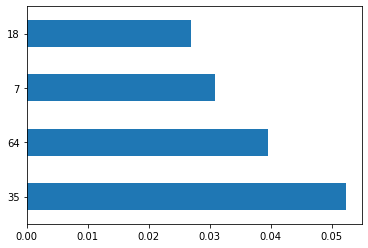

In [ ]:
feat_importances = pd.Series(clf.feature_importances_)
feat_importances.nlargest(4).plot(kind='barh')

In [ ]:
X_train.shape

(83865, 68)

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(68,1)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

In [ ]:
model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [ ]:
y_train

array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
model.fit(X_train, y_train, epochs=5,batch_size=64)

Epoch 1/5
1311/1311 [==============================] - 2s 1ms/step - loss: 0.4273 - accuracy: 0.8110
Epoch 2/5
1311/1311 [==============================] - 2s 1ms/step - loss: 0.2047 - accuracy: 0.9158
Epoch 3/5
1311/1311 [==============================] - 2s 1ms/step - loss: 0.1441 - accuracy: 0.9432
Epoch 4/5
1311/1311 [==============================] - 2s 1ms/step - loss: 0.1112 - accuracy: 0.9573
Epoch 5/5
1311/1311 [==============================] - 2s 1ms/step - loss: 0.0888 - accuracy: 0.9660


In [ ]:
y_train = [1 if value=='a' else 0 for value in y_train]

In [ ]:
y_train = np.array(y_train)

In [ ]:
model.fit(X_train, y_train, epochs=10,batch_size=64)

Epoch 1/10
1311/1311 [==============================] - 2s 1ms/step - loss: 0.0258 - accuracy: 0.9981
Epoch 2/10
1311/1311 [==============================] - 2s 1ms/step - loss: 2.4658e-07 - accuracy: 1.0000
Epoch 3/10
1311/1311 [==============================] - 2s 2ms/step - loss: 2.4439e-07 - accuracy: 1.0000
Epoch 4/10
1311/1311 [==============================] - 2s 2ms/step - loss: 2.3973e-07 - accuracy: 1.0000
Epoch 5/10
1311/1311 [==============================] - 2s 2ms/step - loss: 2.3101e-07 - accuracy: 1.0000
Epoch 6/10
1311/1311 [==============================] - 2s 1ms/step - loss: 2.1640e-07 - accuracy: 1.0000
Epoch 7/10
1311/1311 [==============================] - 2s 1ms/step - loss: 1.9254e-07 - accuracy: 1.0000
Epoch 8/10
1311/1311 [==============================] - 2s 1ms/step - loss: 1.6080e-07 - accuracy: 1.0000
Epoch 9/10
1311/1311 [==============================] - 2s 1ms/step - loss: 1.1957e-07 - accuracy: 1.0000
Epoch 10/10
1311/1311 [===========================

In [ ]:
y_test = [1 if value=='a' else 0 for value in y_test]
y_test = np.array(y_test)

In [ ]:
model.evaluate(X_test,  y_test, verbose=2)

1124/1124 - 1s - loss: 5.5907e-08 - accuracy: 1.0000


[5.590698393120874e-08, 1.0]